# Day 6: Constrained Optimization

---

- Challenges
  - 1d constrained example; gradient nonzero
  - Feasibility
- Types of constraints
  - Equality
  - Inequality
- Interpreting constraints
  - Implicit curve
  - Explicit curve
  - Constraint as contours; gradient
- Equality constraints
  - Lagrange multipliers
- Inequality constraints
  - KKT conditions


In [1]:
import grama as gr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from plotnine import *
DF = gr.Intention()

# Set figure options
plt.rcParams['figure.figsize'] = [6, 6] # Need square aspect ratio for gradients to appear normal
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower


## Challenges

---

With constraints, stationarity is no longer sufficient. For example:

$$\min\, f(x) = \exp(x)$$
$$\text{wrt.}\, x$$
$$\text{s.t.}\, x \geq 0.2$$


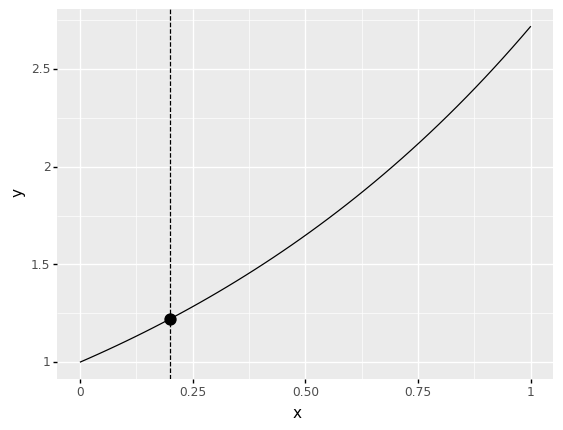

<ggplot: (8733051185755)>

In [2]:
x_s = 0.2

(
    gr.df_make(x=np.linspace(0, 1))
    >> gr.tf_mutate(y=gr.exp(DF.x))
    >> ggplot(aes("x", "y"))
    + geom_line()
    + geom_point(data=gr.df_make(x=x_s, y=np.exp(x_s)), size=4)
    + geom_vline(xintercept=x_s, linetype="dashed")
)


The gradient is clearly nonzero! The conditions for *constrained* optimality must be different from the unconstrained stationarity conditions.


### Feasibility

Constraints also limit our feasible region


#### Feasible example

![Feasible](./images/d6-feasible.png)



#### Infeasible example

![Infeasible](./images/d6-infeasible.png)

## Types of Constraints

---

### Equality constraint

$$\text{s.t.}\, h(x) = 0$$

Must be satisfied

![Equality](./images/d6-equality.png)

### Inequality constraint

$$\text{s.t.}\, g(x) \leq 0$$

Can be active or inactive

![Inequality](./images/d6-inequality.png)


The homework (NB2) depicts the feasible region associated with an inequality constraint by shading the feasible region.


Text(0.5, 1.0, 'Feasible region shown by shading')

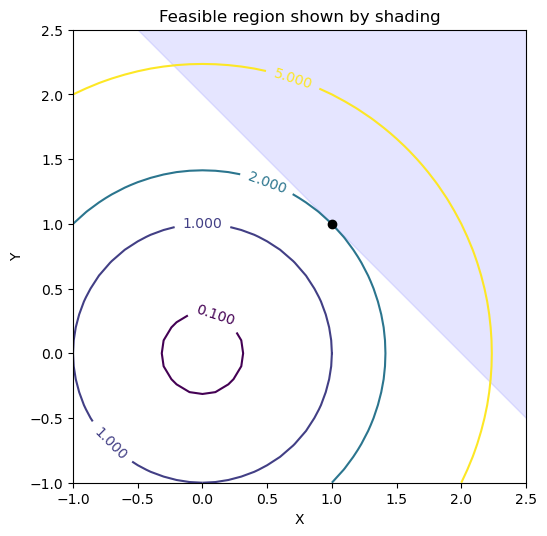

In [3]:
# NOTE: No need to edit, run and inspect
# Objective function
fun_bowl = lambda X: X[0]**2 + X[1]**2
# Gradient
grad_bowl = lambda X: np.array([X[0], X[1]])
# Constraint, as line
fun_line = lambda x: -x + 2

# Contour data
delta = 0.1
x = np.arange(-1, +3, delta)
y = np.arange(-1, +3, delta)
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = fun_bowl([X[i, j], Y[i, j]])
# Constraint data
y_line = list(map(fun_line, x))
# Gradient data
x_s = np.array([1, 1])
g_s = grad_bowl(x_s) * 0.3
        
# Create contour plot
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, levels=[0.1, 1.0, 2.0, 5.0])
plt.fill_between(x, y_line, 2.5, color="blue", alpha=0.1)
plt.plot(x_s[0], x_s[1], "k.", markersize=12)

# Plot tail
ax.clabel(CS, inline=1, fontsize=10)
plt.xlabel("X")
plt.ylabel("Y")
plt.xlim((-1.0, +2.5))
plt.ylim((-1.0, +2.5))
ax.set_aspect(aspect=1)
plt.title("Feasible region shown by shading")

## Interpreting constraints

---

Let's look at an example

$$\text{s.t.}\, h(x, y) = x + y - 1 = 0$$

This is an *implicit* curve; only those values of $x, y$ that satisfy the constraint $h(x, y) = 0$ are on the constraint. 

### Explicit curve

We can make it explicit by solving for one of the variables. For this one $y = 1 - x$. We could use this to re-parameterize an objective:

$$f(x, y(x)) = f(x, 1 - x)$$

We can't always do this! So we need other techniques to deal with constraints.

### Constraint as contours

Note that we can also plot contours of the constraint function; only the zero-contour is feasible.


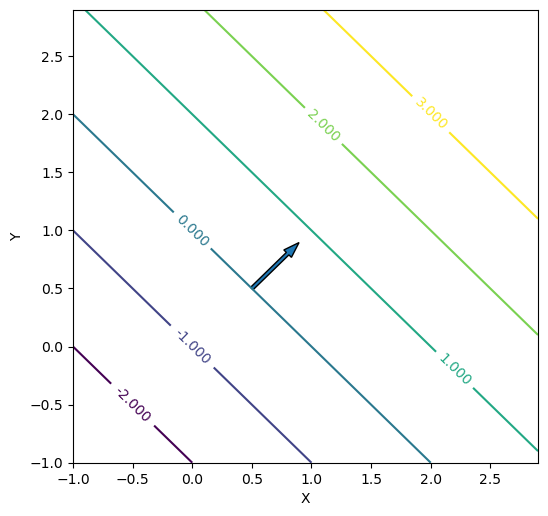

In [4]:
# Constraint as contour
fun_con = lambda X: X[0] + X[1] - 1

delta = 0.1
x = np.arange(-1, +3, delta)
y = np.arange(-1, +3, delta)
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = fun_con([X[i, j], Y[i, j]])
        
# Create contour plot
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, levels=[-2, -1, 0, +1, +2, +3])
ax.clabel(CS, inline=1, fontsize=10)
plt.xlabel("X")
plt.ylabel("Y")
a_grad = plt.arrow(
    0.5, # x base
    0.5, # y base
    0.3, # dx
    0.3, # dy
    width=0.03,
)

Note that the constraint function has its own gradient. This plays an important role in constrained optimization.

Let's look at some points that satisfy the constraint, and compare them against objective contours.


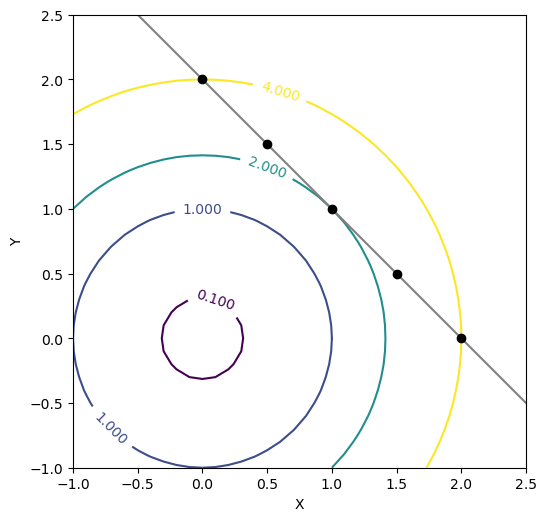

In [5]:
# NOTE: No need to edit, run and inspect
# Objective function
fun_bowl = lambda X: X[0]**2 + X[1]**2
# Gradient
grad_bowl = lambda X: np.array([X[0], X[1]])
# Constraint, as line
fun_line = lambda x: -x + 2

# Contour data
delta = 0.1
x = np.arange(-1, +3, delta)
y = np.arange(-1, +3, delta)
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = fun_bowl([X[i, j], Y[i, j]])
# Constraint data
y_line = list(map(fun_line, x))
# Gradient data
x_s = np.array([1, 1])
g_s = grad_bowl(x_s) * 0.3
        
# Create contour plot
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, levels=[0.1, 1.0, 2.0, 4.0])
plt.plot(x, y_line, color="gray")
plt.plot(x_s[0], x_s[1], "k.", markersize=12)
plt.plot(
    [0.0, 0.5, 1.5, 2.0], 
    [2.0, 1.5, 0.5, 0.0],
     "k.", 
     markersize=12
)

# Use proxy artists for legend
a_con = mpatches.Patch(color='gray', label='Constraint')

# Plot tail
ax.clabel(CS, inline=1, fontsize=10)
plt.xlabel("X")
plt.ylabel("Y")
plt.xlim((-1.0, +2.5))
plt.ylim((-1.0, +2.5))
ax.set_aspect(aspect=1)

We can think about optimization with an equality constraint as an exercise in "sliding" a point along the constraint until we find the minimum.  

Note that the minimum satisfies the constraint (lies on the line) at a point where the constraint is *tangent* to the objective contours. At this point, the gradients of the constraint and objective are *aligned*. If they were *not* aligned, we could move opposite to the objective gradient $\nabla_x f$ in order to further reduce the objective value.


## Equality Constraints: Lagrange Multipliers

---

Consider

$$\min\, f(x)$$
$$\text{wrt.}\, x$$
$$\text{s.t.}\, h(x) = 0$$

In order for a point to be optimal $x^*$, it has to 

1. Satisfy the constraint $h(x^*) = 0$
2. The gradient of the objective and constraint must be aligned

For example:

![Aligned gradients](./images/d6-gradient-alignment.png)



### The Lagrangian

$$L(x, \lambda) = f(x) - \lambda h(x)$$

This introduces a new variable: the *lagrange multiplier* $\lambda$.

Note that we can obtain the gradient-alignment expression from the Lagrangian:

$$0 = \nabla_{x} L = \nabla_x f(x) - \lambda \nabla_x h(x)$$

Which gives us $\nabla_x f = \lambda \nabla_x h$.


### Multiple constraints

We can formulate a [lagrangian](https://en.wikipedia.org/wiki/Lagrange_multiplier) for the case with multiple equality constraints.

$$\min\, f(x)$$
$$\text{wrt.}\, x$$
$$\text{s.t.}\, h_i(x) = 0\text{ for all }i = 1, \dots, n$$

The lagrangian is then

$$L(x, \lambda) = f(x) - \sum_{i=1}^n \lambda_i h_i(x)$$

this must satisfy

$$\left.\nabla_x L\right|_{x^*} = 0$$

$$h_i(x^*) = 0$$
